# Curse of Dimensionality
## Task 1
Let $\mathbf{C}_d = \{\mathbf{x}\in \mathbb{R}^p\mid\|\mathbf{x}\|_\infty\leq\frac{d}{2}\}$ denote the $p$-dimensional hypercube of edge length $d$, centered at the orign.
### *Part A*
Assume $\mathbf{X}$ to be uniformly distributed in $\mathbf{C}_1$. Determine $d$ in dependence of $p$ and $q\in[0, 1]$, such that
$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$
holds.

Because $\mathbf{X}$ is uniformly distributed in $\mathbf{C}_d$, let

$$
p(\mathbf{x}) = \begin{cases}
\epsilon & \quad \text{for } x\in \mathbf{C}_d \\
f(\mathbf{x}) & \quad \text{otherwise.} \end{cases}
$$
Now,
$$
\begin{align*}
& \because \quad \,\; Pr(\mathbf{X}\in\mathbf{C}_d) = q \\
& \Rightarrow \quad q = \int_{\mathbf{C}_d}p(\mathbf{x})\; \mathrm{d}\mathbf{x} \\
& \Rightarrow \quad q = \int_{\mathbf{C}_d}\epsilon\; \mathrm{d}\mathbf{x} \\
& \Rightarrow \quad q = \epsilon\int_{\mathbf{C}_d}\mathrm{d}\mathbf{x} \\
& \Rightarrow \quad q = \epsilon(d^p) \\
& \therefore \quad \,\; d = (\frac{q}{\epsilon})^{1/p} \\
\end{align*}
$$

### *Part B*
Let the components of the $p$-dimensional random variable $\mathbf{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathbf{X}^1|\leq2.576)=0.99$. For an arbitrary $p$, determine the probability $Pr(\|\mathbf{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathbf{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.

$$
\begin{align*}
& \because \quad \,\; Pr(|\mathbf{X}^1| \leq 2.576) = 0.99 \\
& \Rightarrow \quad Pr(\|\mathbf{X}^p\| \leq 2.576) = (0.99)^p \\
& \Rightarrow \quad Pr(\|\mathbf{X}^p\|_\infty\gt2.576) = 1 - Pr(\|\mathbf{X}^p\| \leq 2.576) \\
& \therefore \quad \,\; Pr(\|\mathbf{X}^p\|_\infty\gt2.576) = 1 - (0.99)^p
\end{align*}
$$
Now, for $p = 2$, $p = 3$ and $p = 500$
$$
\begin{align*}
& Pr(\|\mathbf{X}^2\|_\infty\gt2.576) = 1 - (0.99)^2 = 0.0199 \\
& Pr(\|\mathbf{X}^3\|_\infty\gt2.576) = 1 - (0.99)^3 = 0.0297 \\
& Pr(\|\mathbf{X}^{500}\|_\infty\gt2.576) = 1 - (0.99)^{500} = 0.9934 \\
\end{align*}
$$
respectively.

## Task 2
Provide the PYTHON code to the following tasks (the code needs to be commented properly):
### *Part A*
Sample $100$ uniformly distributed random vectors from the box $[-1, 1]^{d}$ for $d = 2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Uniformly sampled vectors in $[-1, 1]^2$')

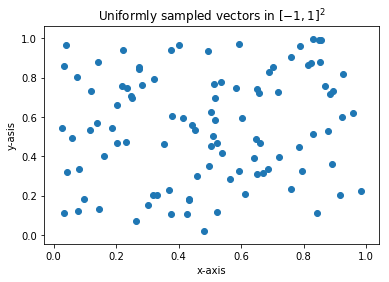

In [2]:
def sample(n, d):
    """Sample n random vectors from a d-dimensional cube [-1, 1]^d ."""
    return np.random.random((n, d))

d = 2      # number of features or dimensions
n = 100    # number of samples

x = sample(n, d)

# visualize sampled vectors
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x-axis')
plt.ylabel('y-asis')
plt.title('Uniformly sampled vectors in $[-1, 1]^2$')

### *Part B*
For each of the $100$ vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors $\mathbf{x}$, $\mathbf{y}$ the cosine of the angle between the two vectors is defined as

$$\cos{((\mathbf{x}, \mathbf{y}))} = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{\|\mathbf{x}\|\|\mathbf{y}\|}.$$


In [3]:
def angle(x, y):
    """
    Return angule between vectors x and y in radians.
    
    Specifically, this function implements the following operation:
    cos^-1(<x, y>/(|x|*|y|))
    """
    
    dot = np.dot(x, y)          # inner product of x and y
    norm_x = np.sqrt(x.dot(x))  # norm of vector x
    norm_y = np.sqrt(y.dot(y))  # norm of vector y
    
    # prevent division by zero
    if norm_x == 0 or norm_y == 0:
        return 0
    
    # calculate angle between x and y
    angle = np.arccos(dot/(norm_x*norm_y))
    
    return angle

In [4]:
def avgNNAngle(x):
    """
    Return average angle between neighbouring vectors of data sample x.
    
    :param x: a n*d array representing n samples from d-dimensional space
    :returns: [avg, std] with average avg and st-distribution std of nearest neighbor angular distances
    """
    
    # calculate sample size and dimension
    n, d = x.shape
    min_angles = np.zeros(n)
    
    # iterate over every vector a at index i in data sample x
    for i, a in enumerate(x):
        # calculate angular distance to nearest neighbor of vector a
        min_angles[i] = min([angle(a, b) \
                           for j, b in enumerate(x) if j!=i])
    
    # return average and st-deviation of all nearest neighbor angular distances
    return [np.average(min_angles), np.std(min_angles)]

# call avgNNAngle function on our data sample x
avg_nn_angle, std_nn_angle = avgNNAngle(x)

# display average of nearest neighbor angular distances
avg_nn_angle

0.0078508769678959315

### *Part C*
Repeat the above for dimensions $d = 1, ..., 1000$ and use the results to plot the average minimum angle against the dimension.

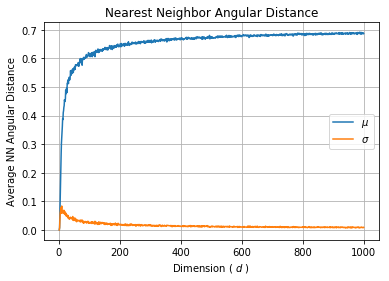

In [5]:
def dSweep(d_sweep, n=100):
    """
    Return average angle between n nearest neighbouring vectors sampled from [-1, 1]^d (for d in d_sweep).
    
    :param d_sweep: range of values to vary dimension d of sampling space [-1, 1]^d over
    :param n: number of randomly sampled vectors (default 100)
    :returns: a len(d_sweep)*2 array with averages in first colum and respective std in second colum
    """
    
    # map each element d in d_sweep to the output of avgNNAngle(n, d)
    # stack all outputs into rows of a list and return
    return list(map(lambda d: \
                    avgNNAngle(sample(n, d)), d_sweep))

d_sweep = np.arange(1, 1001)    # sweep dimension from 1 to 1000
avg_nn_angle = dSweep(d_sweep)  # get avg and std of nearest neighbor angular distances

# plot avg and std of nearest neighbor angular distances
plt.plot(d_sweep, avg_nn_angle)
plt.xlabel('Dimension ( $d$ )')
plt.ylabel('Average NN Angular Distance')
plt.title('Nearest Neighbor Angular Distance')
plt.legend(['$\mu$', '$\sigma$'])
plt.grid()

### *Part D*
Give an interpretation of the result. What conclusion can you draw for $2$ randomly sampled vectors in a $d$-dimensional space?

The above result shows the following:
* The angular distance between $2$ randomly sampled vectors increases with dimension $d$ of the sample space.
* This increasing angular distance converges with increasing $d$, meaning that $2$ randomly sampled vectors are increasingly equidistant from their respective nearest neighbors in higher dimensional space.
* Because the samples are increasingly equidistant from each other, this means that distance-based classifiers (e.g. k-Nearest Neighbors) cannot be used on such data in high-dimensional space.

### *Part E*
Does the result change if the sample size increases?

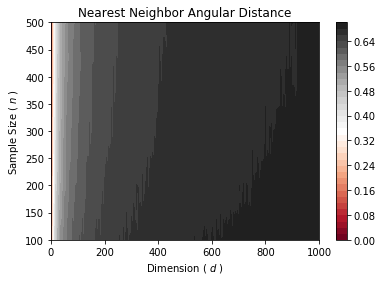

In [6]:
def nSweep(d_sweep, n_sweep):
    """
    Return average angle between n nearest neighbouring vectors sampled from [-1, 1]^d (for d in d_sweep, for n in n_sweep).
    
    :param d_sweep: values to vary dimension d of sampling space [-1, 1]^d over
    :param n_sweep: values to vary number of samples over
    :returns: a len(d_sweep)*len(n_sweep) array with average nearest neighbor angular distances
    """
    
    # map each element n in n_sweep to first column (taking only avg values) of dSweep(d_sweep, n)
    avg_nn_angle = lambda n: np.asarray(dSweep(d_sweep, n))[:, 0]
    return list(map(avg_nn_angle, n_sweep))

n_sweep = np.arange(100, 501, 100)        # sweep #samples from 100 to 500
avg_nn_angle = nSweep(d_sweep, n_sweep)   # get avg of nearest neighbor angular distances

# contour-plot avg of nearest neighbor angular distances
plt.contourf(d_sweep, n_sweep, avg_nn_angle, 40, cmap='RdGy')
plt.xlabel('Dimension ( $d$ )')
plt.ylabel('Sample Size ( $n$ )')
plt.title('Nearest Neighbor Angular Distance')
plt.colorbar()

Intuitively, as is evident from the contour plot above, increasing the sample size $n$ decreases the average angular distance between neighbouring vectors in a $d$-dimensional feature space. The rate of decrease, however, decreases with increasing $n$.

# Statistical Decision Making
## Task 3
<img src="figure1.jpg" style="width: 220px;">
Answer the following questions. All answers must be justified.
### *Part A*
The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $X=1$ and $Y=1$ is $0.02$). Is this table a probability table? If so, why?

### *Part B*
Based on Figure 1 give the conditional expectation $\mathbb{E}_{Y \mid X=2}[Y]$ and the probability of the event $X=1$ under the condition that $Y=3$.

### *Part C*
Is the function $p(x, y)$ given by
$$
p(x, y) = \begin{cases}
1 & \quad \text{for } 0\leq x\leq 1\text{, } 0\leq y\leq \frac{1}{2} \\
0 & \quad \text{otherwise} \end{cases}
$$
a joint density function for two random variables?

### *Part D*
For two random variables $X$ and $Y$ the joint density function is given by
$$
p(x, y) = \begin{cases}
2\mathit{e}^{-(x+y)} & \quad \text{for } 0\leq x\leq y\text{, } 0\leq y \\
0 & \quad \text{otherwise.} \end{cases}
$$
What are the marginal density functions for $X$ and $Y$ respectively?

### *Part E*
Let the joint density function of two random variables $X$ and $Y$ be given by
$$
p(x, y) = \begin{cases}
\frac{1}{15}(2x+4y) & \quad \text{for } 0\leq x\leq 3\text{, } 0\leq y\leq 1 \\
0 & \quad \text{otherwise.} \end{cases}
$$
Determine the probability for $X\leq 2$ under the condition that $Y = \frac{1}{2}$.

## Task 4
Show that the covariance matrix $\mathbf{C}$ of any random variable $\mathbf{X}\in\mathbb{R}^p$ is symmetric positive semidefinite, i.e. $\mathbf{C}=\mathbf{C}^T$ and $\mathbf{x}^T\mathbf{Cx}\geq 0$ for any covariance matrix $\mathbf{C}\in\mathbb{R}^{p\times p}$ and any $\mathbf{x}\in\mathbb{R}^p$.

First we prove that $\mathbf{C}=\mathbf{C}^T$:
$$
\begin{align*}
& \because \quad \,\; \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}^T-\mathbf{\mu}^T)) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T-\mathbf{X\mu}^T-\mathbf{\mu X}^T+\mathbf{\mu\mu}^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbb{E}(\mathbf{X\mu}^T)-\mathbb{E}(\mathbf{\mu X}^T)+\mathbb{E}(\mathbf{\mu\mu}^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbb{E}(\mathbf{X})\mathbf{\mu}^T-\mathbf{\mu}\mathbb{E}(\mathbf{X}^T)+\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbf{\mu\mu}^T-\mathbf{\mu\mu}^T+\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}(\mathbf{XX}^T)^T-(\mathbf{\mu\mu}^T)^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}((\mathbf{XX}^T)^T)-(\mathbf{\mu\mu}^T)^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}((\mathbf{X}^T)^T(\mathbf{X})^T)-(\mathbf{\mu}^T)^T(\mathbf{\mu})^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}(\mathbf{X}\mathbf{X}^T)-\mathbf{\mu}\mathbf{\mu}^T \\
& \therefore \quad \,\; \mathbf{C}^T = \mathbf{C} \\
\end{align*}
$$
Next, we prove that $\mathbf{x}^T\mathbf{Cx}\geq 0$:
$$
\begin{align*}
& \because \quad \,\; \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbf{x}^T\mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T)\mathbf{x} \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T\mathbf{x}) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}((\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(YY^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(Y^2) \\
& \therefore \quad \mathbf{x}^T\mathbf{Cx} \geq 0
\end{align*}
$$